In [161]:
# 20250318 by Dejiang Yin, dj.yin at hotmail.com
from psrqpy import QueryATNF
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from psrqpy.utils import get_gc_catalogue

In [162]:
# Paper line: https://ui.adsabs.harvard.edu/abs/2023RAA....23e5012Y/abstract
# see Figure 5 and equation (3)

In [163]:
query = QueryATNF()
ATNF_psr = query.pandas
ATNF_psr 

,PSRJ,PSRJ_REF,RAJ,RAJ_ERR,RAJ_REF,DECJ,DECJ_ERR,DECJ_REF,POSEPOCH,POSEPOCH_REF,...,UPRMASS,MASSFN_ERR,MINOMDOT,H0_SD,ASSOC_ORIG,ASSOC_REF,TYPE_ORIG,TYPE_REF,BINCOMP_ORIG,BINCOMP_REF
0,J0002+6216,cwp+17,00:02:58.17,0.0200,cwp+17,+62:16:09.4,0.100,cwp+17,55806.000000,cwp+17,...,NaN,NaN,NaN,2.885253e-26,"GRS:4FGL_J0002.8+6217[aab+22],XRS:1XSPS_J00025...",aab+22,HE[wcp+18],wcp+18,NaN,
1,J0006+1834,cnt96,00:06:04.8,0.2000,cn95,+18:34:59,4.000,cn95,49079.500000,cn95,...,NaN,NaN,NaN,5.155743e-26,NaN,,NaN,,NaN,
2,J0007+7303,aaa+09c,00:07:01.7,0.2000,awd+12,+73:03:07.4,0.800,awd+12,54952.000000,awd+12,...,NaN,NaN,NaN,6.153093e-25,"GRS:4FGL_J0007.0+7303[aab+22],XRS:RX_J0007.0+7...",aab+22,NRAD[aab+22],aab+22,NaN,
3,J0011+08,dsm+16,00:11:34,31.0000,dsm+16,+08:10,8.000,dsm+16,57022.000000,dsm+16,...,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,
4,J0012+5431,dcm+23,00:12:23.3,0.1000,dcm+23,+54:31:47,3.000,dcm+23,58912.000000,dcm+23,...,NaN,NaN,NaN,9.674751e-28,NaN,,RRAT[dcm+23],dcm+23,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,J2354+6155,NaN,23:54:04.7830,0.0001,dgb+19,+61:55:46.845,0.001,dgb+19,56000.000000,dgb+19,...,NaN,NaN,NaN,4.408303e-26,NaN,,NaN,,NaN,
3469,J2354-22,mbc+19,23:54:26,NaN,mbc+19,-22:51:53,NaN,mbc+19,54973.000000,mbc+19,...,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,
3470,J2355+0051,mzl+23,23:55:51.2885,0.0014,mzl+23,00:51:09.57,0.040,mzl+23,59492.667393,mzl+23,...,0.634719,1.291439e-09,0.004462,7.836396e-28,NaN,,NaN,,He[mzl+23],mzl+23
3471,J2355+1523,dcm+23,23:55:48.62,0.0800,dcm+23,+15:23:18,2.000,dcm+23,59092.000000,dcm+23,...,NaN,NaN,NaN,4.582996e-27,NaN,,RRAT[dcm+23],dcm+23,NaN,


In [164]:
ATNF_GCpsr =ATNF_psr[ATNF_psr['ASSOC_ORIG'].str.contains('GC:', na=False)]
ATNF_Field_psr = ATNF_psr[~ATNF_psr['ASSOC_ORIG'].str.contains('GC:', na=False)]
# ATNF_Field_psr.to_excel(r"E:\DoFcker\data\timing\M13\M13G\paper\PB_Mc\ATNF_GCpsr_20250222_Catalogue_Version_2.5.1.xlsx") 
ATNF_GCpsr

,PSRJ,PSRJ_REF,RAJ,RAJ_ERR,RAJ_REF,DECJ,DECJ_ERR,DECJ_REF,POSEPOCH,POSEPOCH_REF,...,UPRMASS,MASSFN_ERR,MINOMDOT,H0_SD,ASSOC_ORIG,ASSOC_REF,TYPE_ORIG,TYPE_REF,BINCOMP_ORIG,BINCOMP_REF
8,J0024-7204C,NaN,00:23:50.3546,0.00010,frk+17,-72:04:31.5048,0.0004,frk+17,51600.000000,frk+17,...,NaN,NaN,NaN,NaN,"GC:47Tuc(NGC104),XRS:[bgh+06]",bgh+06,NaN,,NaN,
9,J0024-7204D,NaN,00:24:13.88092,0.00006,frk+17,-72:04:43.8524,0.0002,frk+17,51600.000000,frk+17,...,NaN,NaN,NaN,NaN,"GC:47Tuc(NGC104),XRS:[bgh+06]",bgh+06,NaN,,NaN,
10,J0024-7204E,NaN,00:24:11.10528,0.00005,frk+17,-72:05:20.1492,0.0002,frk+17,51600.000000,frk+17,...,0.389109,1.643166e-09,0.067286,9.353659e-28,"GC:47Tuc(NGC104),XRS:[bgh+06]",bgh+06,NaN,,NaN,
11,J0024-7204F,NaN,00:24:03.85547,0.00010,frk+17,-72:04:42.8183,0.0002,frk+17,51600.000000,frk+17,...,NaN,NaN,NaN,8.779420e-28,"GC:47Tuc(NGC104),XRS:[bgh+06]",bgh+06,NaN,,NaN,
12,J0024-7204G,NaN,00:24:07.9603,0.00010,frk+17,-72:04:39.7030,0.0005,frk+17,51600.000000,frk+17,...,NaN,NaN,NaN,NaN,"GC:47Tuc(NGC104),XRS:[bgh+06]",bgh+06,NaN,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,J2133-0049C,pqm+21,21:33:27.0,NaN,har10a,-00:49:24,NaN,har10a,NaN,NaN,...,NaN,NaN,NaN,NaN,GC:NGC7089(M2)[pqm+21],pqm+21,NaN,,NaN,
3339,J2133-0049D,pqm+21,21:33:27.0,NaN,har10a,-00:49:24,NaN,har10a,NaN,NaN,...,NaN,NaN,NaN,NaN,GC:NGC7089(M2)[pqm+21],pqm+21,NaN,,NaN,
3340,J2133-0049E,pqm+21,21:33:27.0,NaN,har10a,-00:49:24,NaN,har10a,NaN,NaN,...,NaN,NaN,NaN,NaN,GC:NGC7089(M2)[pqm+21],pqm+21,NaN,,NaN,
3350,J2140-2310A,rsb+04,21:40:22.40610,0.00046,rsb+04,-23:10:48.7936,0.0097,rsb+04,52162.000000,rsb+04,...,0.239870,2.936699e-08,4.697942,NaN,GC:M30(NGC7099),NaN,NaN,,NaN,


In [165]:
from psrqpy.utils import get_gc_catalogue
Paulo_GCpsr = get_gc_catalogue()
Paulo_GCpsr = Paulo_GCpsr.to_pandas()
Paulo_GCpsr

,Cluster,NGC,Pulsar,Offset,Offset error,Period,dP/dt,dP/dt error,DM,DM error,Pb,x,x error,e,e error,m2
0,47 Tuc,NGC 104,J0023-7204C,1.210,NaN,5.75678,-4.9850,0.0006,24.599,0.0020,NaN,NaN,NaN,NaN,NaN,NaN
1,47 Tuc,NGC 104,J0024-7204D,0.680,NaN,5.35757,-0.3429,0.0007,24.729,0.0020,NaN,NaN,NaN,NaN,NaN,NaN
2,47 Tuc,NGC 104,J0024-7205E,0.650,NaN,3.53633,9.8510,0.0006,24.236,0.0020,2.25684,1.98184,NaN,0.00031,NaN,0.18
3,47 Tuc,NGC 104,J0024-7204F,0.190,NaN,2.62358,6.4500,0.0004,24.379,0.0050,NaN,NaN,NaN,NaN,NaN,NaN
4,47 Tuc,NGC 104,J0024-7204G,0.290,NaN,4.04038,-4.2150,0.0020,24.441,0.0050,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,M2,NGC 7089,J2133-0049H,NaN,NaN,2.87800,NaN,NaN,43.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,M2,NGC 7089,J2133-0049I,NaN,NaN,8.78000,NaN,NaN,44.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,M2,NGC 7089,J2133-0049J,NaN,NaN,4.50000,NaN,NaN,43.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,M30,NGC 7099,J2140-2310A,0.067,NaN,11.01930,-5.1810,0.0200,25.064,0.0041,0.17399,0.23494,NaN,0.00012,NaN,0.11


In [166]:
GC = Paulo_GCpsr[(Paulo_GCpsr['Cluster'] == 'M15') | (Paulo_GCpsr['NGC'] == 'M15')]
GC 

,Cluster,NGC,Pulsar,Offset,Offset error,Period,dP/dt,dP/dt error,DM,DM error,Pb,x,x error,e,e error,m2
317,M15,NGC 7078,B2127+11A,0.018,NaN,110.66469,-2099.0700,0.0100,67.226,0.001,NaN,NaN,NaN,NaN,NaN,NaN
318,M15,NGC 7078,B2127+11B,0.079,NaN,56.13304,954.5800,0.0200,67.731,0.006,NaN,NaN,NaN,NaN,NaN,NaN
319,M15,NGC 7078,B2127+11C,0.944,NaN,30.52929,498.8500,0.0500,67.100,NaN,0.33528,2.5183,0.0012,0.681386,0.000016,NaN
320,M15,NGC 7078,B2127+11D,0.019,NaN,4.80280,-107.0100,0.0090,67.277,0.002,NaN,NaN,NaN,NaN,NaN,NaN
321,M15,NGC 7078,B2127+11E,0.135,NaN,4.65144,18.5465,0.0002,66.586,0.001,NaN,NaN,NaN,NaN,NaN,NaN
322,M15,NGC 7078,B2127+11F,0.279,NaN,4.02704,2.7113,0.0006,65.597,0.002,NaN,NaN,NaN,NaN,NaN,NaN
323,M15,NGC 7078,B2127+11G,0.106,NaN,37.66017,163.4000,0.9000,66.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,M15,NGC 7078,B2127+11H,0.038,NaN,6.74339,2.1380,0.0030,67.117,0.005,NaN,NaN,NaN,NaN,NaN,NaN
325,M15,NGC 7078,J2129+1210I,NaN,NaN,5.12220,NaN,NaN,67.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,M15,NGC 7078,J2129+1210J,NaN,NaN,11.84248,20.4070,0.0070,66.688,0.008,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
GC[0:1]

,Cluster,NGC,Pulsar,Offset,Offset error,Period,dP/dt,dP/dt error,DM,DM error,Pb,x,x error,e,e error,m2
317,M15,NGC 7078,B2127+11A,0.018,NaN,110.66469,-2099.07,0.01,67.226,0.001,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
GC[0:-1]

,Cluster,NGC,Pulsar,Offset,Offset error,Period,dP/dt,dP/dt error,DM,DM error,Pb,x,x error,e,e error,m2
317,M15,NGC 7078,B2127+11A,0.018,NaN,110.66469,-2099.0700,0.0100,67.226,0.001,NaN,NaN,NaN,NaN,NaN,NaN
318,M15,NGC 7078,B2127+11B,0.079,NaN,56.13304,954.5800,0.0200,67.731,0.006,NaN,NaN,NaN,NaN,NaN,NaN
319,M15,NGC 7078,B2127+11C,0.944,NaN,30.52929,498.8500,0.0500,67.100,NaN,0.33528,2.5183,0.0012,0.681386,0.000016,NaN
320,M15,NGC 7078,B2127+11D,0.019,NaN,4.80280,-107.0100,0.0090,67.277,0.002,NaN,NaN,NaN,NaN,NaN,NaN
321,M15,NGC 7078,B2127+11E,0.135,NaN,4.65144,18.5465,0.0002,66.586,0.001,NaN,NaN,NaN,NaN,NaN,NaN
322,M15,NGC 7078,B2127+11F,0.279,NaN,4.02704,2.7113,0.0006,65.597,0.002,NaN,NaN,NaN,NaN,NaN,NaN
323,M15,NGC 7078,B2127+11G,0.106,NaN,37.66017,163.4000,0.9000,66.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,M15,NGC 7078,B2127+11H,0.038,NaN,6.74339,2.1380,0.0030,67.117,0.005,NaN,NaN,NaN,NaN,NaN,NaN
325,M15,NGC 7078,J2129+1210I,NaN,NaN,5.12220,NaN,NaN,67.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,M15,NGC 7078,J2129+1210J,NaN,NaN,11.84248,20.4070,0.0070,66.688,0.008,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
print(np.min(GC["DM"][0:-1]))
print(np.max(GC["DM"][0:-1]))
# print(np.min(GC["DM"]))
# print(np.max(GC["DM"]))
# Known_DM_mean = np.average(GC["DM"])
Known_DM_mean = np.average(GC["DM"][0:-1])
#上限
DM_max = 10**(1.52*np.log10(Known_DM_mean) - 1.93)
#下限
DM_min = 10**(1.52*np.log10(Known_DM_mean) - 3.36)
#中间值
DM_mean= 10**(1.52*np.log10(Known_DM_mean) - (1.93+3.36)/2)

PSR_DM_min = Known_DM_mean - DM_max
PSR_DM_max = Known_DM_mean + DM_max

print(DM_max)
print(DM_min)
print(DM_mean)
print(PSR_DM_min)
print(PSR_DM_max)

65.597
67.86
6.989136629318733
0.25967104787653766
1.3471734974707181
59.88814908496698
73.86642234360446


In [170]:
cluster_stats['DM_range']

Cluster
47 Tuc             1.3410
Glimpse-C01       62.1000
M13                1.3044
M14                3.3000
M15                2.2630
M2                 0.9000
M22                5.4310
M28                4.6079
M3                 0.3700
M5                 0.7446
M53                1.5840
M62                3.0000
M70                0.5000
M71                5.9380
M80                0.2920
NGC 1851           1.6210
NGC 2808           1.0000
NGC 362            1.1000
NGC 6440           7.5500
NGC 6441           7.1410
NGC 6517          11.2030
NGC 6522           4.0100
NGC 6544           3.1495
NGC 6624          10.4940
NGC 6752           0.5040
Omega Centauri     7.9540
Terzan 1           4.4700
Terzan 5           9.9300
Name: DM_range, dtype: float64

In [171]:
 cluster_stats['DM_range']

Cluster
47 Tuc             1.3410
Glimpse-C01       62.1000
M13                1.3044
M14                3.3000
M15                2.2630
M2                 0.9000
M22                5.4310
M28                4.6079
M3                 0.3700
M5                 0.7446
M53                1.5840
M62                3.0000
M70                0.5000
M71                5.9380
M80                0.2920
NGC 1851           1.6210
NGC 2808           1.0000
NGC 362            1.1000
NGC 6440           7.5500
NGC 6441           7.1410
NGC 6517          11.2030
NGC 6522           4.0100
NGC 6544           3.1495
NGC 6624          10.4940
NGC 6752           0.5040
Omega Centauri     7.9540
Terzan 1           4.4700
Terzan 5           9.9300
Name: DM_range, dtype: float64

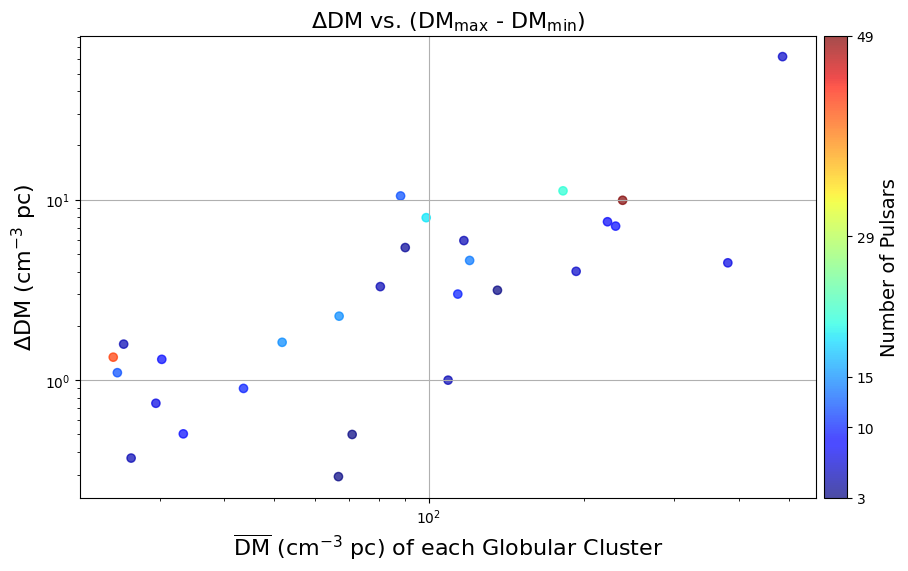

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 创建DataFrame
df = Paulo_GCpsr

# 过滤掉只有一个脉冲星的星团
cluster_counts = df['Cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts >= 3].index
df_filtered = df[df['Cluster'].isin(valid_clusters)]

# 计算每个星团的DM平均值和最大值减去最小值
cluster_stats = df_filtered.groupby('Cluster')['DM'].agg(['mean', lambda x: x.max() - x.min()])
cluster_stats.columns = ['mean_DM', 'DM_range']

# 获取每个星团的脉冲星数量
cluster_stats['num_pulsars'] = df_filtered['Cluster'].value_counts()

# 获取脉冲星数量的最小值和最大值
min_pulsars = cluster_stats['num_pulsars'].min()
max_pulsars = cluster_stats['num_pulsars'].max()

# 定义刻度数组，并替换最小值和最大值
ticks = [2, 10, 15, 29, 40]  # 默认刻度
ticks[0] = min_pulsars  # 替换最小值
ticks[-1] = max_pulsars  # 替换最大值

# 绘制关系图
plt.figure(figsize=(10, 6))
scatter = plt.scatter(cluster_stats['mean_DM'], cluster_stats['DM_range'], 
                      c=cluster_stats['num_pulsars'], cmap='jet', alpha=0.7)

# 添加颜色条
cbar = plt.colorbar(scatter, fraction=0.04, pad=0.01)  # 调整颜色条的大小和位置
cbar.set_label('Number of Pulsars', fontsize=14)  # 设置颜色条标签
cbar.set_ticks(ticks)  # 设置颜色条刻度

# 添加标题和标签
plt.title(r'$\Delta$DM vs. (DM$_{\rm max}$ - DM$_{\rm min}$)', fontsize=16)
plt.xlabel(r"$\overline{\rm DM}$ (cm$^{−3}$ pc) of each Globular Cluster", fontsize=16)
plt.ylabel(r"$\Delta$DM (cm$^{−3}$ pc)", fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

plt.show()

斜率 (Slope): 0.0778262323044468
截距 (Intercept): -3.547762149913364
相关系数 (R-value): 0.749022874460337
P值 (P-value): 4.528274956947254e-06
标准误差 (Standard Error): 0.01350078640593997


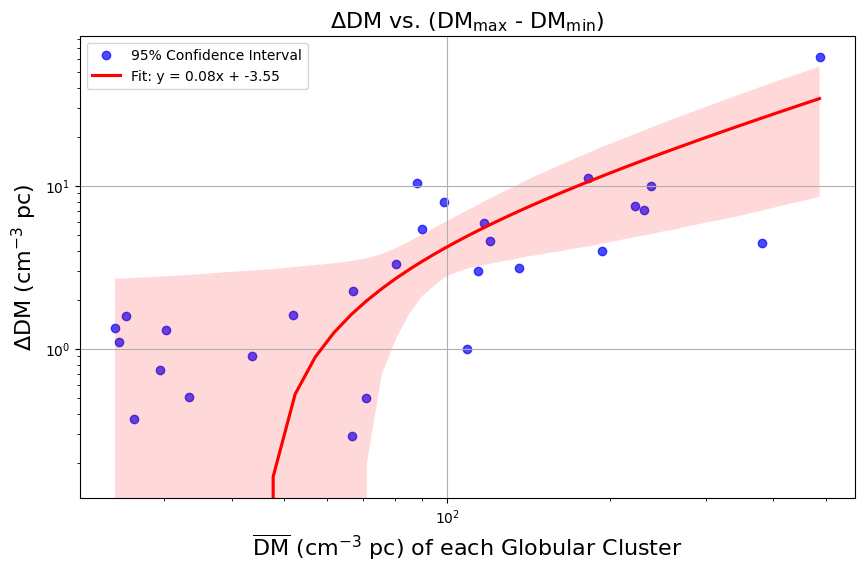

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# 创建DataFrame
df = Paulo_GCpsr

# 过滤掉只有一个脉冲星的星团
cluster_counts = df['Cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts >= 3].index
df_filtered = df[df['Cluster'].isin(valid_clusters)]

# 计算每个星团的DM平均值和最大值减去最小值
cluster_stats = df_filtered.groupby('Cluster')['DM'].agg(['mean', lambda x: x.max() - x.min()])
cluster_stats.columns = ['mean_DM', 'DM_range']


# 相关性分析
slope, intercept, r_value, p_value, std_err = linregress(cluster_stats['mean_DM'], cluster_stats['DM_range'])

# 打印相关性分析结果
print(f"斜率 (Slope): {slope}")
print(f"截距 (Intercept): {intercept}")
print(f"相关系数 (R-value): {r_value}")
print(f"P值 (P-value): {p_value}")
print(f"标准误差 (Standard Error): {std_err}")

# 绘制关系图
plt.figure(figsize=(10, 6))
sns.regplot(x=cluster_stats['mean_DM'], y=cluster_stats['DM_range'], scatter_kws={'color': 'blue', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'label': f'Fit: y = {slope:.2f}x + {intercept:.2f}'}, 
            ci=95, label='95% Confidence Interval')

# 添加标题和标签
plt.title(r'$\Delta$DM vs. (DM$_{\rm max}$ - DM$_{\rm min}$)', fontsize=16)
plt.xlabel(r"$\overline{\rm DM}$ (cm$^{−3}$ pc) of each Globular Cluster", fontsize=16)
plt.ylabel(r"$\Delta$DM (cm$^{−3}$ pc)", fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

# 显示图例
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# 创建DataFrame
df = Paulo_GCpsr

# 过滤掉只有一个脉冲星的星团
cluster_counts = df['Cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts >= 3].index
df_filtered = df[df['Cluster'].isin(valid_clusters)]

# 计算每个星团的DM平均值和最大值减去最小值
cluster_stats = df_filtered.groupby('Cluster')['DM'].agg(['mean', lambda x: x.max() - x.min()])
cluster_stats.columns = ['mean_DM', 'DM_range']

# 获取每个星团的脉冲星数量
cluster_stats['num_pulsars'] = df_filtered['Cluster'].value_counts()

# 获取脉冲星数量的最小值和最大值
min_pulsars = cluster_stats['num_pulsars'].min()
max_pulsars = cluster_stats['num_pulsars'].max()

# 定义刻度数组，并替换最小值和最大值
ticks = [2, 10, 15, 29, 40]  # 默认刻度
ticks[0] = min_pulsars  # 替换最小值
ticks[-1] = max_pulsars  # 替换最大值

# 相关性分析
slope, intercept, r_value, p_value, std_err = linregress(cluster_stats['mean_DM'], cluster_stats['DM_range'])

# 打印相关性分析结果
print(f"斜率 (Slope): {slope}")
print(f"截距 (Intercept): {intercept}")
print(f"相关系数 (R-value): {r_value}")
print(f"P值 (P-value): {p_value}")
print(f"标准误差 (Standard Error): {std_err}")

# 绘制关系图
plt.figure(figsize=(10, 6))

# 使用plt.scatter绘制散点图，颜色映射到脉冲星数量
scatter = plt.scatter(cluster_stats['mean_DM'], cluster_stats['DM_range'], 
                      c=cluster_stats['num_pulsars'], cmap='jet', s=100, alpha=0.7)

# 添加颜色条
cbar = plt.colorbar(scatter, fraction=0.04, pad=0.01)  # 调整颜色条的大小和位置
cbar.set_label('Number of Pulsars', fontsize=14)  # 设置颜色条标签
cbar.set_ticks(ticks)  # 设置颜色条刻度

# 添加拟合线和置信区间
#sns.regplot(x=cluster_stats['mean_DM'], y=cluster_stats['DM_range'], 
#            scatter=False, ci=95, line_kws={'color': 'red', 'label': f'Fit: y = {slope:.2f}x + {intercept:.2f}'})

sns.regplot(x=cluster_stats['mean_DM'], y=cluster_stats['DM_range'], scatter_kws={'color': 'blue', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'label': f'Fit: y = {slope:.2f}x + {intercept:.2f}'}, 
            ci=95, label='95% Confidence Interval')

# 添加标题和标签
plt.title(r'$\Delta$DM vs. (DM$_{\rm max}$ - DM$_{\rm min}$)', fontsize=16)
plt.xlabel(r"$\overline{\rm DM}$ (cm$^{−3}$ pc) of each Globular Cluster", fontsize=16)
plt.ylabel(r"$\Delta$DM (cm$^{−3}$ pc)", fontsize=16)
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

# 显示图例
plt.legend()
# plt.savefig(r"D:\GC_DM.pdf", dpi =300, bbox_inches="tight" )
# plt.savefig(r"D:\GC_DM.jpg", dpi =300, bbox_inches="tight" )
plt.show()

斜率 (Slope): 0.0778262323044468
截距 (Intercept): -3.547762149913364
相关系数 (R-value): 0.749022874460337
P值 (P-value): 4.528274956947254e-06
标准误差 (Standard Error): 0.01350078640593997
